In [24]:
import pandas as pd
df = pd.read_csv(r'C:\Users\sures\Desktop\123.csv')


In [25]:
df.isnull().sum()

Total_balance      0
Cus_id             0
Unnamed: 2       100
Annual_salary      0
Long_lat           0
Age                0
dtype: int64

In [26]:
# Separate features and labels
X, y = df[['Age']].values, df['Annual_salary'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[19]
 [26]
 [30]
 [21]
 [35]
 [18]
 [30]
 [21]
 [40]
 [24]]

Labels:
[27842.22  8603.88 10851.72 13481.91  8703.84 11713.74 21277.36 18010.37
 29512.28 12048.98]


In [27]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 70, rows
Test Set: 30 rows


In [28]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [29]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [15956. 16222. 16594. 17073. 16328. 17339. 17285. 17073. 16062. 16807.]
Actual labels   :  [28925.61 27327.65 10851.72 25517.55 15929.29  7155.96 14952.56 21497.98
  9844.98 27326.11]


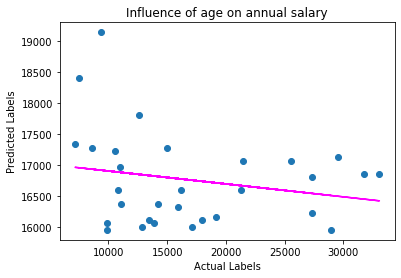

In [30]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Influence of age on annual salary')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 61211008.14177867
RMSE: 7823.746426219262
R2: -0.05229423480200657


In [32]:
df.Age.corr(df.Annual_salary)

-0.036503904066141256

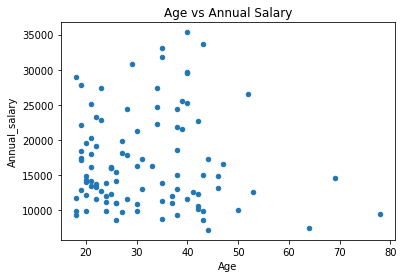

In [33]:
# Create a scatter plot
df.plot.scatter(title='Age vs Annual Salary', x='Age', y='Annual_salary')

In [34]:
import pandas as pd
df = pd.read_csv(r'C:\Users\sures\Desktop\123.csv')
df.count()



Total_balance    100
Cus_id           100
Unnamed: 2         0
Annual_salary    100
Long_lat         100
Age              100
dtype: int64

In [35]:
# Separate features and labels
X, y = df[['Total_balance','Age']].values, df['Annual_salary'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[ 1758186.58       19.  ]
 [  665248.77       26.  ]
 [  806710.31       30.  ]
 [  465855.96       21.  ]
 [  260858.31       35.  ]
 [  410738.73       18.  ]
 [  400793.8        30.  ]
 [  881717.52       21.  ]
 [29983336.71       40.  ]
 [ 3916213.76       24.  ]]

Labels:
[27842.22  8603.88 10851.72 13481.91  8703.84 11713.74 21277.36 18010.37
 29512.28 12048.98]


In [36]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d, rows\nTest Set: %d rows' % (X_train.size, X_test.size))

Training Set: 140, rows
Test Set: 60 rows


In [37]:
# Decision Tree Algorithm

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)
f = open('filename.txt', 'w')
print(tree, file = f)
f.close()

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best') 

|--- feature_0 <= 696745.22
|   |--- feature_0 <= 502063.41
|   |   |--- feature_0 <= 268372.19
|   |   |   |--- feature_0 <= 259199.23
|   |   |   |   |--- feature_0 <= 230521.70
|   |   |   |   |   |--- feature_0 <= 158165.98
|   |   |   |   |   |   |--- value: [9727.24]
|   |   |   |   |   |--- feature_0 >  158165.98
|   |   |   |   |   |   |--- value: [9226.08]
|   |   |   |   |--- feature_0 >  230521.70
|   |   |   |   |   |--- value: [11058.84]
|   |   |   |--- feature_0 >  259199.23
|   |   |   |   |--- value: [8703.84]
|   |   |--- feature_0 >  268372.19
|   |   |   |--- feature_1 <

MSE: 81273350.93005332
RMSE: 9015.173372157262
R2: -0.3971911462174178


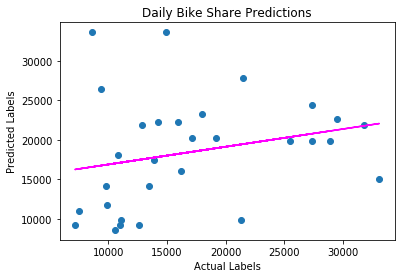

In [38]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()